In [11]:
# Import the necessary libraries
import numpy as np
import pandas as pd
from PIL import Image
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
from keras.datasets import mnist
from tensorflow.keras.models import Sequential
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.regularizers import l2
from tensorflow.keras.utils import to_categorical, plot_model
%matplotlib inline

In [12]:
# Function to get the MNIST data
def get_data():

  # Load the MNIST data from keras datasets
  (_,_), (X, y) = tf.keras.datasets.mnist.load_data()

  X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.1, random_state=10)
  
  # Get indices of train and test data where label is either 4 or 9
  train_filter = np.where((y_train == 4)|(y_train == 9))
  test_filter = np.where((y_test == 4)|(y_test == 9))

  # Get only the data consiting of 4s and 9s
  X_train, y_train = X_train[train_filter],y_train[train_filter]
  X_test, y_test = X_test[test_filter],y_test[test_filter]
  
  # Reduce the number of train data points by 50%
  X_train, _, y_train, _ = train_test_split(X_train, y_train, train_size=0.5, random_state=10)

  # Helper code to replace 9's with label 1 and 4's with label 0 for train data
  get_nine = np.where((y_train == 9))
  y_train = np.zeros(y_train.shape)
  y_train[get_nine] = 1

  # Helper code to replace 9's with label 1 and 4's with label 0 for test data
  get_nine = np.where((y_test == 9))
  y_test = np.zeros(y_test.shape)
  y_test[get_nine] = 1

  return X_train, X_test, y_train, y_test

In [13]:
# Call the function get_data to get the train and test data points
X_train, X_test, y_train, y_test = get_data()

# Split the train data into train and validation set with 70% train data and random state as 40
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, train_size=0.7, random_state=40)

In [14]:
# Take a quick look at the shape of the train, validation and test data
X_train.shape, y_train.shape, X_test.shape, y_test.shape, X_val.shape, y_val.shape # type: ignore


((74, 28, 28), (74,), (1776, 28, 28), (1776,), (33, 28, 28), (33,))

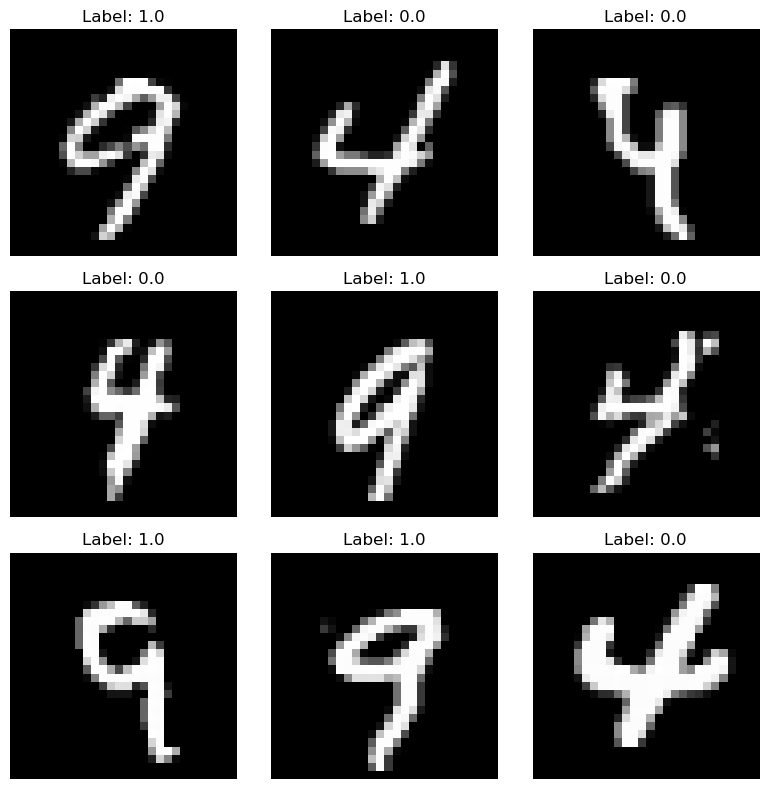

In [15]:
# Function to plot 9 random images from the training data along with their labels
def plot_random_images(X_train, y_train):
    # Set up the plot
    fig, axes = plt.subplots(3, 3, figsize=(8, 8))
    axes = axes.ravel()  # Flatten the 2D array of axes to 1D

    # Select 9 random indices
    random_indices = np.random.choice(X_train.shape[0], 9, replace=False)

    for i, ax in enumerate(axes):
        idx = random_indices[i]
        ax.imshow(X_train[idx], cmap='gray')
        ax.set_title(f'Label: {y_train[idx]}')
        ax.axis('off')  # Turn off the axis

    plt.tight_layout()
    plt.show()

# Call the function to plot 9 random images
plot_random_images(X_train, y_train) # type: ignore

In [16]:
# Define the neural network
model = Sequential([
    Dense(200, activation='relu', input_shape=(784,)),  # Input layer with flattened input (28x28 = 784)
    Dense(200, activation='relu'),                      # Hidden layer 1
    Dense(200, activation='relu'),                      # Hidden layer 2
    Dense(1, activation='sigmoid')                      # Output layer
])

# Compile the model with binary cross-entropy and Adam optimizer, and use accuracy as the metric
model.compile(optimizer=Adam(),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Flatten the images for input into the neural network
X_train_flat = X_train.reshape(X_train.shape[0], -1) # type: ignore
X_val_flat = X_val.reshape(X_val.shape[0], -1) # type: ignore

# Fit the model on the train and validation data for 1000 epochs with batch size of 64
history = model.fit(X_train_flat, y_train, epochs=1000, batch_size=64, validation_data=(X_val_flat, y_val)) # type: ignore

Epoch 1/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 123ms/step - accuracy: 0.4341 - loss: 16.3298 - val_accuracy: 0.6970 - val_loss: 7.4988
Epoch 2/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.8488 - loss: 2.5009 - val_accuracy: 0.5758 - val_loss: 25.4638
Epoch 3/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.6408 - loss: 15.1919 - val_accuracy: 0.6970 - val_loss: 5.9360
Epoch 4/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.9057 - loss: 1.2355 - val_accuracy: 0.8485 - val_loss: 5.4220
Epoch 5/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.9626 - loss: 0.4734 - val_accuracy: 0.6667 - val_loss: 8.0280
Epoch 6/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.8114 - loss: 2.3697 - val_accuracy: 0.8485 - val_loss: 2.7610
Epoch 7/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 1.0000 - loss: 9.4870e-04 - val_accuracy: 0.9091 - val_loss: 1.7107
Epoch 8/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.9768 - loss: 0.3224 - val_accuracy: 0.

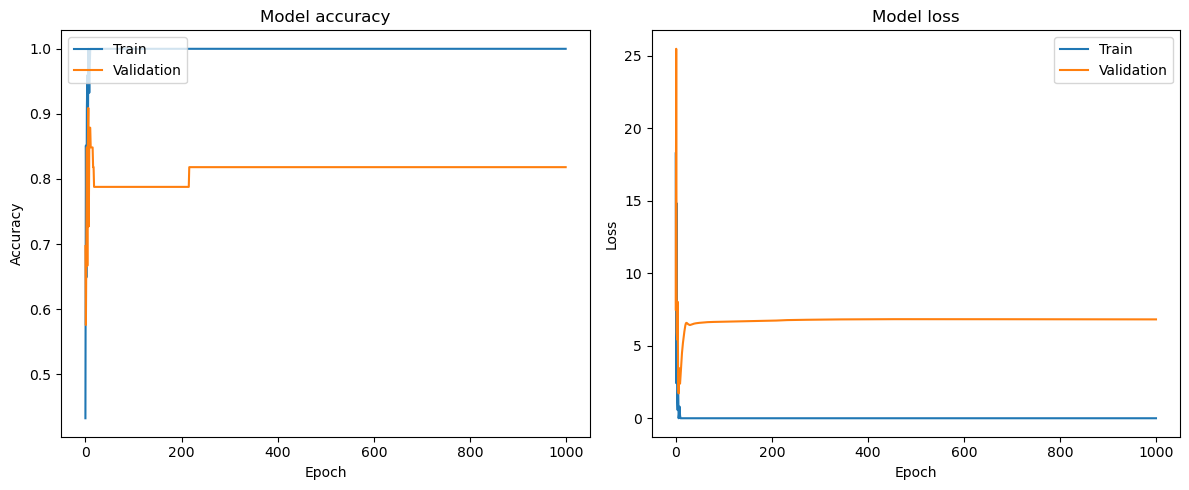

56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 652us/step - accuracy: 0.8505 - loss: 4.3490
Test accuracy: 0.8609


In [17]:
# Function to plot the training history
def plot_training_history(history):
    # Plot training & validation accuracy values
    plt.figure(figsize=(12, 5))
    
    # Plot accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(['Train', 'Validation'], loc='upper left')

    # Plot loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(['Train', 'Validation'], loc='upper right')
    
    plt.tight_layout()
    plt.show()

# Call the function to plot the training history
plot_training_history(history)
# Flatten the test images for input into the neural network
X_test_flat = X_test.reshape(X_test.shape[0], -1) # type: ignore

# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(X_test_flat, y_test) # type: ignore

# Print the accuracy
print(f'Test accuracy: {test_accuracy:.4f}')

REGULARIZED NETWORK
Use the same model definition as given before in the unregularized definition.

Perform any type of regularization techniques (you can mix multiple methods as well) to get a better accuracy as compared to the unregularized model.

In [18]:
# Call the function get_data to get the train and test data points
X_train, X_test, y_train, y_test = get_data()

# Split the train data into train and validation set with 70% train data and random state as 40
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, train_size=0.7, random_state=40)

# Flatten the images for input into the neural network
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_val_flat = X_val.reshape(X_val.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)

In [19]:
# Define the regularized neural network
model = Sequential([
    Dense(200, activation='relu', input_shape=(784,), kernel_regularizer=l2(0.001)),  # Input layer with L2 regularization
    Dropout(0.5),                                                                     # Dropout layer with 50% dropout rate
    Dense(200, activation='relu', kernel_regularizer=l2(0.001)),                      # Hidden layer 1 with L2 regularization
    Dropout(0.5),                                                                     # Dropout layer with 50% dropout rate
    Dense(200, activation='relu', kernel_regularizer=l2(0.001)),                      # Hidden layer 2 with L2 regularization
    Dropout(0.5),                                                                     # Dropout layer with 50% dropout rate
    Dense(1, activation='sigmoid')  # Output layer
])

Epoch 1/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 144ms/step - accuracy: 0.5427 - loss: 43.3076 - val_accuracy: 0.6061 - val_loss: 12.8296
Epoch 2/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.5801 - loss: 33.9673 - val_accuracy: 0.6364 - val_loss: 12.8391
Epoch 3/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.5853 - loss: 35.3784 - val_accuracy: 0.6667 - val_loss: 7.1034
Epoch 4/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.6370 - loss: 23.6472 - val_accuracy: 0.7273 - val_loss: 6.6043
Epoch 5/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.6706 - loss: 25.6238 - val_accuracy: 0.7273 - val_loss: 6.5586
Epoch 6/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.5853 - loss: 27.5126 - val_accuracy: 0.7273 - val_loss: 6.5679
Epoch 7/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.6408 - loss: 21.0983 - val_accuracy: 0.7273 - val_loss: 6.7840
Epoch 8/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.6938 - loss: 19.2852 - val_accuracy:

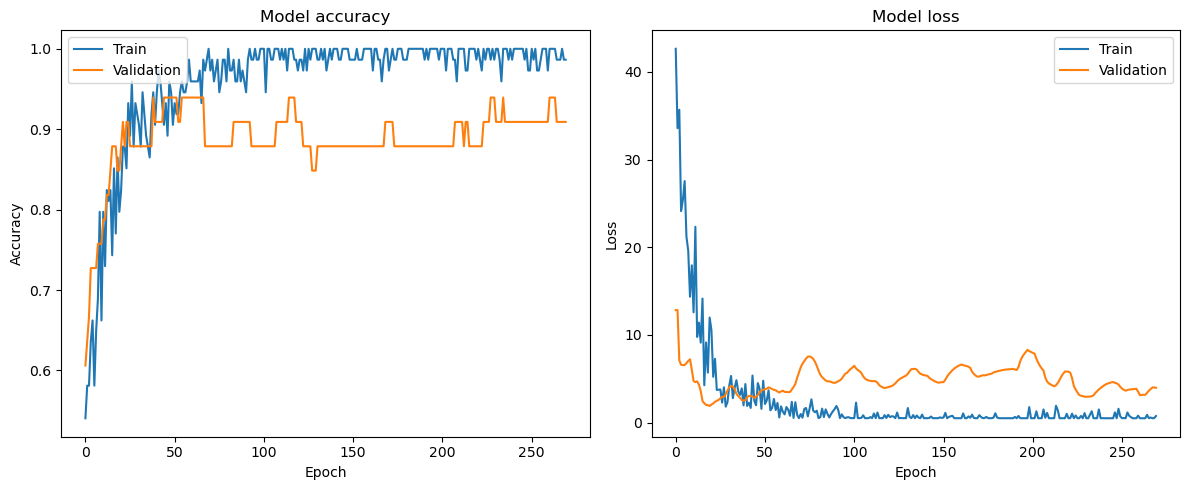

56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 801us/step - accuracy: 0.8792 - loss: 3.1918


Test loss: 3.1044
Test accuracy: 0.8908


In [20]:
# Define the EarlyStopping callback
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',  # Monitor validation loss
    patience=250,         # Stop after 250 epochs with no improvement
    restore_best_weights=True  # Restore the best weights found during training
)

# Compile the model with binary cross-entropy and Adam optimizer, and use accuracy as the metric
model.compile(optimizer=Adam(),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Fit the model on the train and validation data for 1000 epochs with batch size of 64
history = model.fit(
    X_train_flat, y_train,
    epochs=1000,
    batch_size=64,
    validation_data=(X_val_flat, y_val),
    callbacks=[early_stopping]  # Include the EarlyStopping callback
)

# Plot training history
def plot_training_history(history):
    # Plot training & validation accuracy values
    plt.figure(figsize=(12, 5))
    
    # Plot accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(['Train', 'Validation'], loc='upper left')

    # Plot loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(['Train', 'Validation'], loc='upper right')
    
    plt.tight_layout()
    plt.show()

# Call the function to plot the training history
plot_training_history(history)

# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(X_test_flat, y_test)

# Print the accuracy
print(f'Test loss: {test_loss:.4f}')
print(f'Test accuracy: {test_accuracy:.4f}')

# Save the model to a file
model.save('my_model.h5')

# To load the model back
loaded_model = tf.keras.models.load_model('my_model.h5')